# Emotion Detection

**Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.15.0


**Importing Dataset**

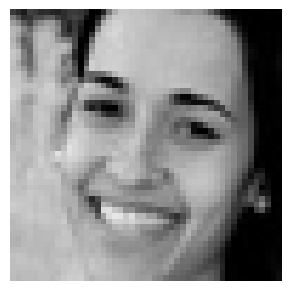

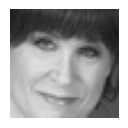

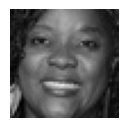

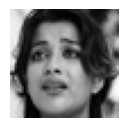

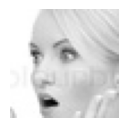

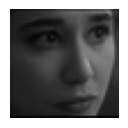

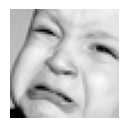

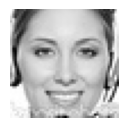

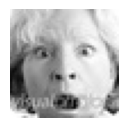

In [3]:
import glob
images = glob.glob("train/**/**", recursive=True)
plt.figure(figsize=(12, 12))
for i in range(9):
    image_path = random.choice(images)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


**Preparing Data for Training**

In [4]:

img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)                  

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [5]:
def convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)  # Fix typo: Change Droupout to Dropout
    return x

In [7]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = convolution(inputs, 32, (3, 3))
    conv_2 = convolution(conv_1, 64, (5, 5))
    conv_3 = convolution(conv_2, 128, (3, 3))

    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)  # Fix typo: Change Dense_f to dense_f

    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs=inputs, outputs=output)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
    

In [8]:
model = model_fer((48, 48, 1))
model.summary()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0  

**Initializing the Model**

In [9]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("Model_weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]


# Training the Model

**The next cell takes time to complete**

In [10]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data =  validation_generator,
validation_steps = validation_steps,
callbacks =  callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6718 - accuracy: 0.3630
Epoch 1: saving model to Model_weights.h5
448/448 [==============================] - 383s 849ms/step - loss: 1.6718 - accuracy: 0.3630 - val_loss: 1.5537 - val_accuracy: 0.4150
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3946 - accuracy: 0.4665
Epoch 2: saving model to Model_weights.h5
448/448 [==============================] - 212s 474ms/step - loss: 1.3946 - accuracy: 0.4665 - val_loss: 1.3699 - val_accuracy: 0.4736
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2723 - accuracy: 0.5169
Epoch 3: saving model to Model_weights.h5
448/448 [==============================] - 566s 1s/step - loss: 1.2723 - accuracy: 0.5169 - val_loss: 1.2934 - val_accuracy: 0.5033
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2012 - accuracy: 0.5457
Epoch 4: saving model to Model_weights.h5
448/448 [==============================] - 8

**Model Evaluation**

In [11]:
model.evaluate(validation_generator)

113/113 [==============================] - 8s 66ms/step - loss: 1.1657 - accuracy: 0.5882


[1.165655255317688, 0.5881861448287964]

**Plotting Loss**

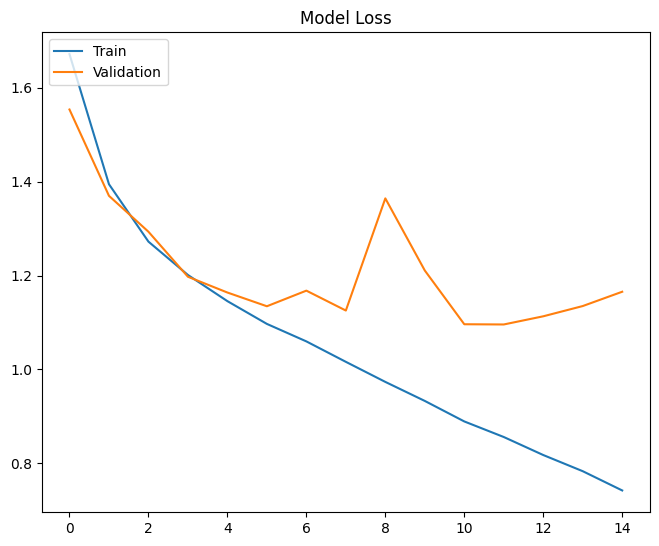

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

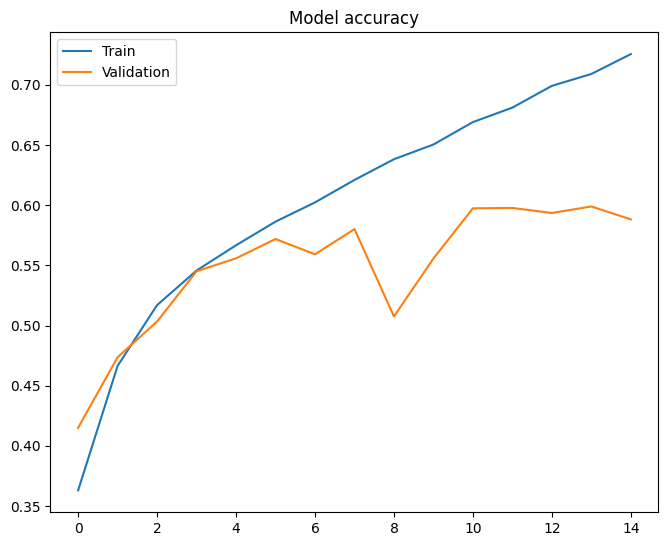

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model** 

In [14]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)